# Reading dataset using pandas

In [83]:
import pandas as pd
from pandas import *
import pytz

In [84]:
movies = pd.read_csv('D:\data_science\pandas\ml-latest-small\movies.csv',sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [85]:
tags = pd.read_csv('D:/data_science/pandas/ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [86]:
ratings = pd.read_csv('D:/data_science/pandas/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [87]:
del ratings['timestamp']
del tags['timestamp']

In [88]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [89]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# data Strucutre

## series

In [90]:
row_0 = tags.iloc[1]
type(row_0)

pandas.core.series.Series

In [91]:
row_0

userId                   2
movieId              60756
tag        Highly quotable
Name: 1, dtype: object

In [92]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [93]:
row_0['userId']

2

In [94]:
'rating' in 'row_0'

False

In [95]:
row_0 = row_0.rename("first_row")
row_0.name 

'first_row'

# Data Frames

In [96]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [97]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [98]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [99]:
tags.iloc[[0,11,1000]]

,userId,movieId,tag
0,2,60756,funny
11,18,431,gangster
1000,474,31,teacher


# Descriptive statistics

In [100]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [101]:
ratings['rating'].mean()

3.501556983616962

In [102]:
ratings['rating'].std()

1.0425292390605359

In [103]:
ratings['rating'].all()

True

In [104]:
ratings['rating'].any()

True

In [105]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [106]:
movies.mean()

movieId    42200.353623
dtype: float64

In [107]:
movies['movieId'].std()

52160.494854438315

In [108]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [109]:
filter_1 = ratings['rating']!=5
print(filter_1)
filter_1.any()

0          True
1          True
2          True
3         False
4         False
          ...  
100831     True
100832    False
100833    False
100834    False
100835     True
Name: rating, Length: 100836, dtype: bool


True

In [110]:
print(filter_1)
filter_1.all()

0          True
1          True
2          True
3         False
4         False
          ...  
100831     True
100832    False
100833    False
100834    False
100835     True
Name: rating, Length: 100836, dtype: bool


False

In [111]:
filter_2 = ratings['rating']>0
print(filter_2)
filter_2.all()

0         True
1         True
2         True
3         True
4         True
          ... 
100831    True
100832    True
100833    True
100834    True
100835    True
Name: rating, Length: 100836, dtype: bool


True

# Data Cleaning

In [112]:
movies.shape

(9742, 3)

In [113]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [114]:
ratings.shape

(100836, 3)

In [115]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [116]:
tags.shape

(3683, 3)

In [117]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [118]:
tag = tags.dropna()

In [119]:
tag.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

# data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251996F0B48>]],
      dtype=object)

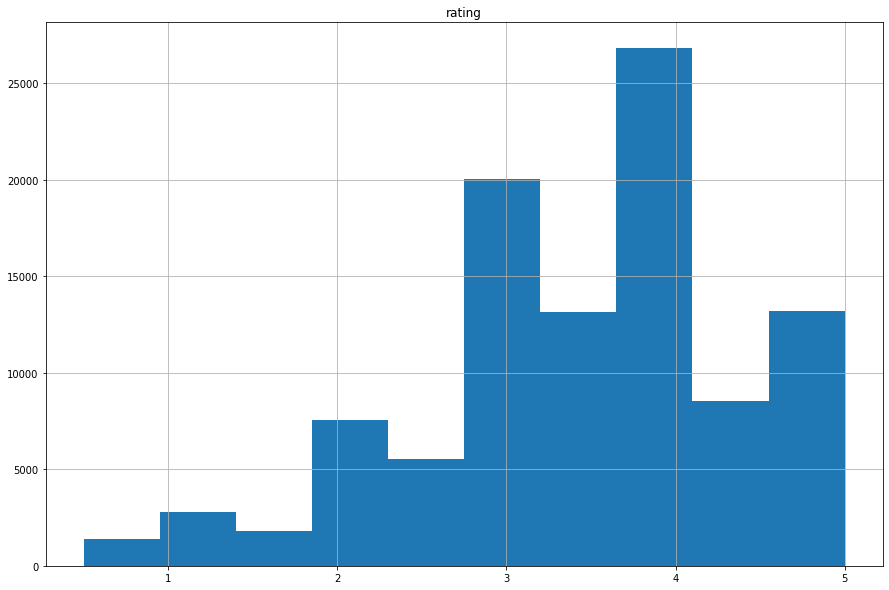

In [120]:
%matplotlib inline
ratings.hist(column='rating',figsize=(15,10))

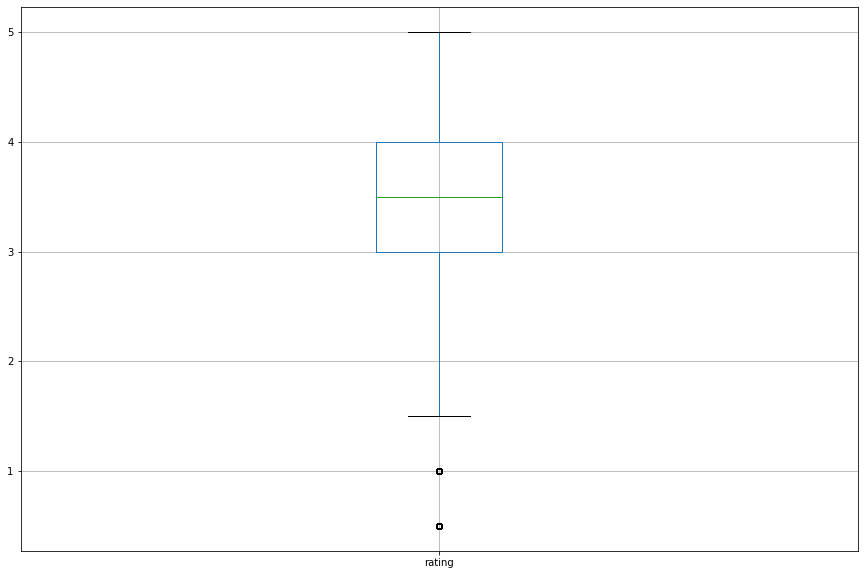

In [121]:
ratings.boxplot(column='rating',figsize=(15,10))

In [122]:
ratings.min()

userId     1.0
movieId    1.0
rating     0.5
dtype: float64

# slicing out columns

In [123]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [124]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [125]:
ratings[1000:1020:2]

,userId,movieId,rating
1000,7,31878,3.5
1002,7,32031,1.5
1004,7,32587,3.5
1006,7,33493,1.0
1008,7,33836,1.0
1010,7,34319,4.5
1012,7,38388,3.5
1014,7,45499,4.0
1016,7,45668,1.0
1018,7,46530,1.0


In [129]:
tag_count = tags['tag'].value_counts()
tag_count[:5]

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
Name: tag, dtype: int64

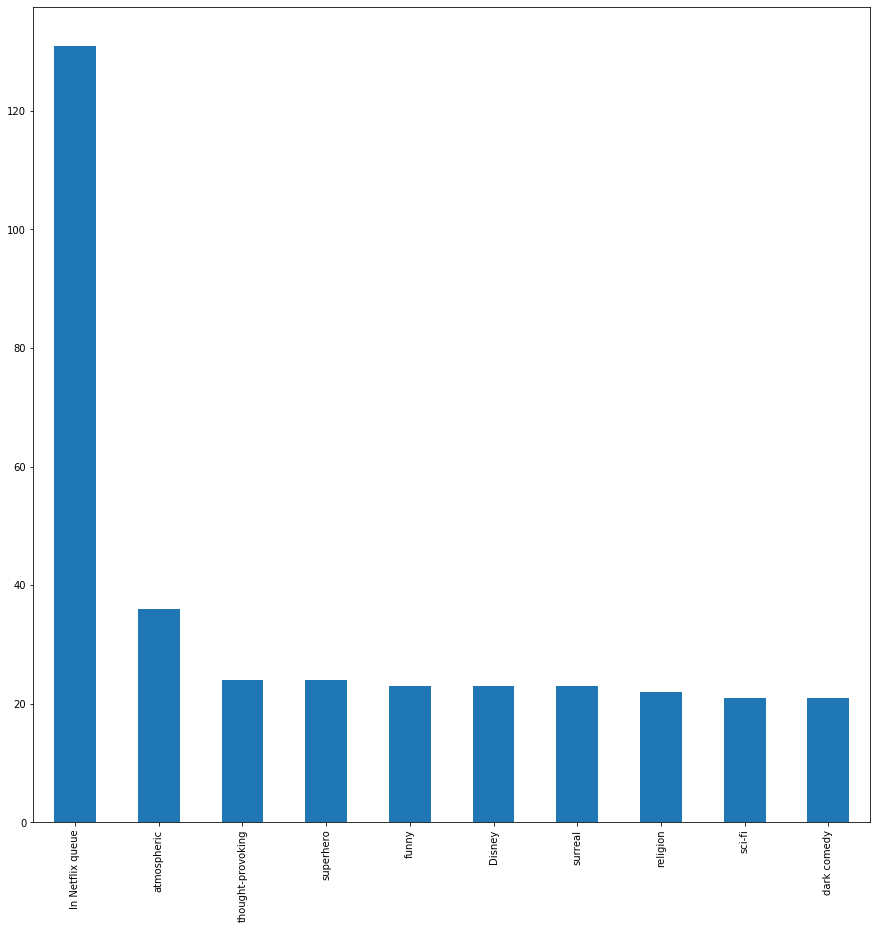

In [130]:
tag_count[:10].plot(kind='bar',figsize=(15,15))